<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read the data
school = pd.read_csv('schoolSAT.csv')

## Display top 7 rows of the dataframe in your notebook

In [4]:
school.head(7)

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0
6,01M539,"New Explorations into Sci, Tech and Math HS",47.0,568.0,583.0,568.0


## Count number of null values (if any) for each column

In [5]:
school.isnull().sum()

DBN                       0
School Name               0
Number of Test Takers    74
Critical Reading Mean    74
Mathematics Mean         74
Writing Mean             74
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [6]:
school = school[['School Name','Number of Test Takers','Critical Reading Mean']]
school.head(7)

,School Name,Number of Test Takers,Critical Reading Mean
0,Henry Street School for International Studies,31.0,391.0
1,University Neighborhood High School,60.0,394.0
2,East Side Community High School,69.0,418.0
3,SATELLITE ACADEMY FORSYTH ST,26.0,385.0
4,CMSP HIGH SCHOOL,NaN,NaN
5,Lower East Side Preparatory High School,154.0,314.0
6,"New Explorations into Sci, Tech and Math HS",47.0,568.0


In [7]:
#drop the null values in each row
school.dropna(inplace=True)
school.head()

,School Name,Number of Test Takers,Critical Reading Mean
0,Henry Street School for International Studies,31.0,391.0
1,University Neighborhood High School,60.0,394.0
2,East Side Community High School,69.0,418.0
3,SATELLITE ACADEMY FORSYTH ST,26.0,385.0
5,Lower East Side Preparatory High School,154.0,314.0


## Display the average, median, and standard deviation of each of your numerical columns

In [8]:
school.describe()

,Number of Test Takers,Critical Reading Mean
count,386.000000,386.000000
mean,103.658031,404.248705
std,145.264496,56.815631
min,7.000000,291.000000
25%,35.000000,370.000000
50%,54.000000,392.500000
75%,92.750000,419.000000
max,1047.000000,674.000000


## Plot two of the numerical columns one against the other in a scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

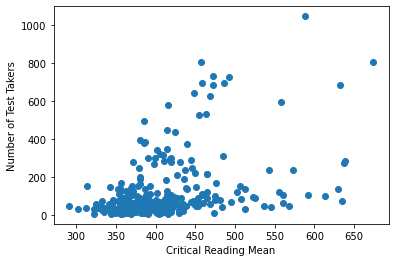

In [9]:
takers = school['Number of Test Takers']
read = school['Critical Reading Mean']
plt.scatter(x=read, y=takers)
plt.ylabel('Number of Test Takers')
plt.xlabel('Critical Reading Mean')
plt.show

## Plot the data distribution of all your numerical columns in histogram and boxplot

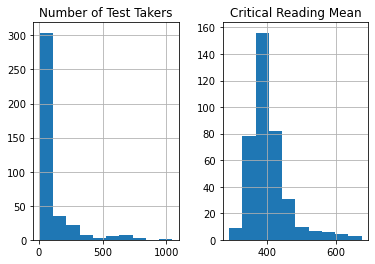

In [12]:
new_school = school[['Number of Test Takers','Critical Reading Mean']]
new_school.hist()

plt.show()

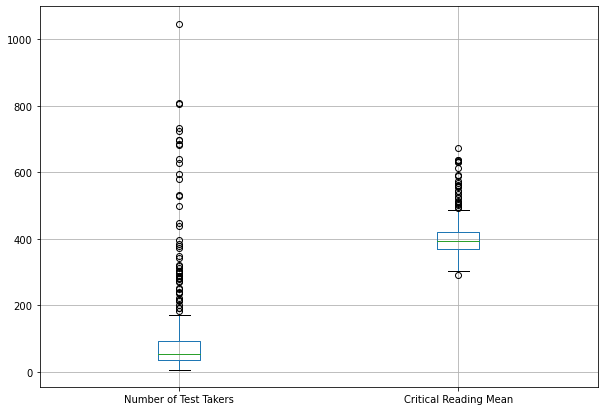

In [13]:
fig = plt.figure(figsize =(10, 7))

new_school.boxplot()

plt.show()

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [14]:
#create a new column with name power of Test Takers
school['Power of Test Takers'] = np.power((school['Number of Test Takers']),2)
school.head()

,School Name,Number of Test Takers,Critical Reading Mean,Power of Test Takers
0,Henry Street School for International Studies,31.0,391.0,961.0
1,University Neighborhood High School,60.0,394.0,3600.0
2,East Side Community High School,69.0,418.0,4761.0
3,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,676.0
5,Lower East Side Preparatory High School,154.0,314.0,23716.0


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bike = pd.read_csv('201709-citibike-tripdata.csv')
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878098 entries, 0 to 1878097
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 214.9+ MB


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1


## Count the number of missing values of each column

In [170]:
bike.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 207468
gender                          0
dtype: int64

In [171]:
#drop the column with nan values (return it without nan values)
bike.dropna(inplace=True)
round(bike.describe(),2)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1670630.00,1670630.00,1670630.00,1670630.00,1670630.00,1670630.00,1670630.00,1670630.00,1670630.00,1670630.00
mean,903.25,1371.71,40.74,-73.98,1362.04,40.74,-73.98,24352.80,1979.53,1.26
std,7853.19,1353.52,0.04,0.06,1350.90,0.05,0.08,5423.32,11.71,0.45
min,61.00,72.00,0.00,-74.03,72.00,0.00,-74.06,14529.00,1885.00,0.00
25%,373.00,362.00,40.72,-74.00,361.00,40.72,-74.00,19013.00,1972.00,1.00
50%,613.00,486.00,40.74,-73.99,485.00,40.74,-73.99,26053.00,1982.00,1.00
75%,1032.00,3143.00,40.76,-73.98,3141.00,40.75,-73.98,29031.00,1989.00,2.00
max,2215580.00,3637.00,40.81,0.00,3637.00,40.81,0.00,31979.00,2001.00,2.00


In [172]:
#make sure the null value is removed
bike.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

In [173]:
import datetime

#add new column 'age', based on their birth year
bike['age'] = datetime.datetime.now().year - bike['birth year']

#replace gender
gender = bike['gender'].replace([0,1,2],['Unknown','Male','Female'],inplace=True)
bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,Male,28.0
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,Male,33.0
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,Male,52.0
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,Male,28.0
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,Male,34.0


In [174]:
import seaborn as sns

#count the gender based on its category
gender_tb = bike['gender'].value_counts().to_frame().reset_index()
gender_tb.columns = ['gender', 'count']

gender_tb

,gender,count
0,Male,1218512
1,Female,444132
2,Unknown,7986


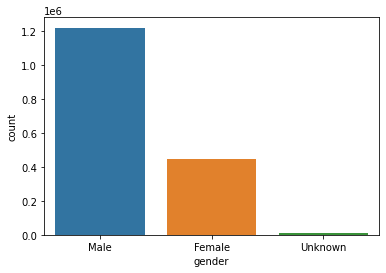

In [175]:
#plotting based on gender
sns.barplot(x = 'gender', y = 'count', data = gender_tb)
plt.show()

In [176]:
usertype_tb = bike['usertype'].value_counts().to_frame().reset_index()
usertype_tb.columns = ['usertype', 'count']

usertype_tb

,usertype,count
0,Subscriber,1623301
1,Customer,47329


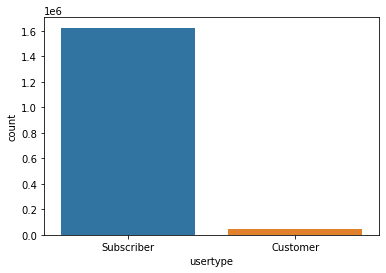

In [177]:
#plotting based on user type
sns.barplot(x = 'usertype', y = 'count', data = usertype_tb)
plt.show()

In [178]:
bike['age'].min(), bike['age'].max()

bike['age'].value_counts().to_frame().reset_index().head()

,index,age
0,31.0,72463
1,33.0,71615
2,32.0,71342
3,34.0,69461
4,36.0,67613


<AxesSubplot:xlabel='age', ylabel='Count'>

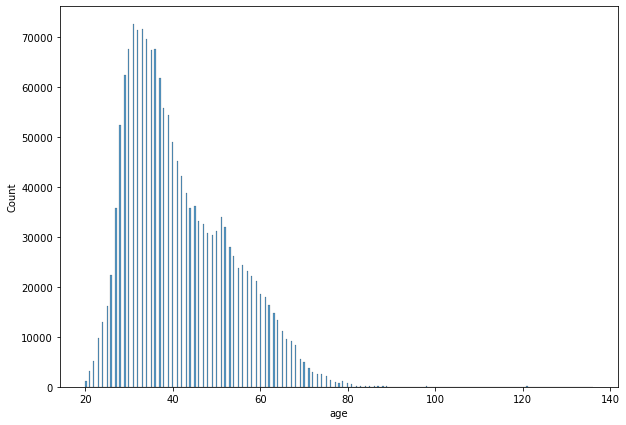

In [179]:
#plot the age distribution
fig = plt.figure(figsize =(10, 7))
sns.histplot(data = age)

## What is the average number of trips per day?

In [253]:
#change data type of start time to date time
bike['starttime'] = pd.to_datetime(bike['starttime'])

#group by berdasarkan date nya lalu dicount dan dapatkan nilai mean nya
avg_trip_day = bike.groupby(bike['starttime'].dt.date)['starttime'].count().mean()

print('The average number of trips in each day is', round(avg_trip_day))

The average number of trips in each day is 55688


## What is the average trip duration?

In [181]:
#get the average number of trip duration
avg_trip_dur = round(bike['tripduration'].mean()/60)

print('The average of trip duration is', avg_trip_dur, 'minutes')

The average of trip duration is 15 minutes


## What days of the week are most rides taken on?
Process the data and plot your answer

Friday       304273
Thursday     260024
Tuesday      250302
Wednesday    237076
Monday       228950
Saturday     220983
Sunday       169022
Name: day_name, dtype: int64


<AxesSubplot:title={'center':'Rides Distribution on days of the week'}>

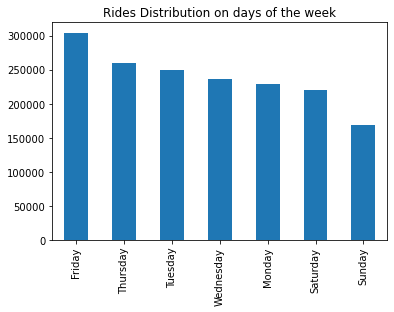

In [248]:
bike['starttime'] = pd.to_datetime(bike['starttime'])

#create new column to get the day name
bike['day_name'] = bike['starttime'].dt.day_name()

#count based on day name
data_per_day = bike['day_name'].value_counts()

print(data_per_day)

data_per_day.plot(kind='bar', title='Rides Distribution on days of the week')

In [183]:
print('The most rides takes on Friday. Counted as many as', data_per_day.max(), 'trips')

The most rides takes on Friday. Counted as many as 304273 trips


## What hour of the day are most rides taken on?
Process the data and plot your answer

0      15018
1       8228
2       4598
3       2732
4       2895
5      10501
6      38979
7      85487
8     141814
9     105236
10     73187
11     74820
12     87486
13     89960
14     91778
15     95299
16    114085
17    166805
18    167284
19    110179
20     71366
21     50735
22     37082
23     25076
Name: hour, dtype: int64


<AxesSubplot:title={'center':'Rides Distribution per Hour'}>

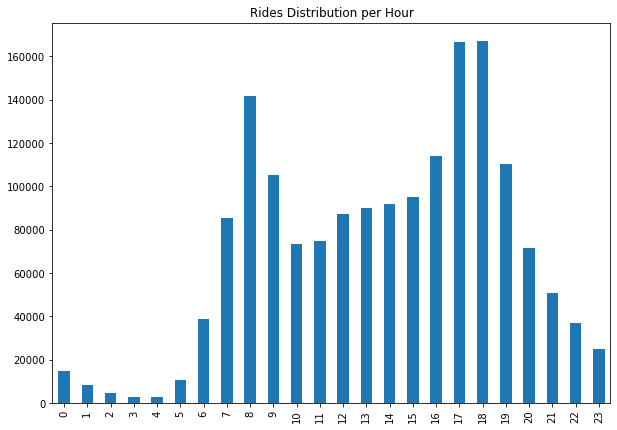

In [184]:
bike['starttime'] = pd.to_datetime(bike['starttime'])

#create new column to get the hour
bike['hour'] = bike['starttime'].dt.hour

#count based on each of the hour
hour_per_day = bike['hour'].value_counts().sort_index()

print(hour_per_day)

hour_per_day.plot(kind='bar', title='Rides Distribution per Hour', figsize=(10,7))

The most rides takes between 5 pm to 6 pm and 8 am

## Is there correlation between age and trip duration?

In [185]:
from numpy import cov
from scipy.stats import pearsonr

covariance = cov(bike['age'], bike['tripduration'])
corr, _ = pearsonr(bike['age'], bike['tripduration'])

print('covariance = \n',covariance)
print('correlation = ',round(corr,3))

covariance = 
 [[ 1.37200613e+02 -3.83360203e+02]
 [-3.83360203e+02  6.16726660e+07]]
correlation =  -0.004


The covariance between age and trip duration is -3.83360203e+02, it means a negative realtionship.

The correlation between age and trip duration is -0.004 it indicates that there is no relationship between the two variables

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [231]:
#membuat new df dengan column start station & end station
pairing_station = pd.DataFrame(bike, columns= ['start station name', 'end station name'])
pairing_station

,start station name,end station name
0,Riverside Dr & W 104 St,W 100 St & Manhattan Ave
1,N 12 St & Bedford Ave,Nassau Ave & Newell St
2,1 Ave & E 78 St,1 Ave & E 68 St
3,St Marks Pl & 2 Ave,Rivington St & Chrystie St
4,Lafayette St & Jersey St,E 35 St & 3 Ave
...,...,...
1878092,Central Park West & W 68 St,9 Ave & W 45 St
1878093,West End Ave & W 107 St,Morningside Ave & W 123 St
1878094,Central Park West & W 68 St,9 Ave & W 45 St
1878096,Amsterdam Ave & W 73 St,E 97 St & Madison Ave


In [232]:
#melakukan group by dan menghitung count untuk setiap start station & end station
top10_tb = pairing_station.groupby(['start station name','end station name']).size().reset_index()

top10_tb = top10_tb.sort_values(by=0, ascending=False)
top10_tb.head(10)

,start station name,end station name,0
72782,E 7 St & Avenue A,Cooper Square & E 7 St,752
114330,Pershing Square North,Broadway & W 32 St,479
136865,W 21 St & 6 Ave,9 Ave & W 22 St,478
114419,Pershing Square North,E 24 St & Park Ave S,477
4706,12 Ave & W 40 St,West St & Chambers St,459
45817,Cooper Square & E 7 St,E 7 St & Avenue A,459
118498,Richardson St & N Henry St,Graham Ave & Conselyea St,456
121767,S 4 St & Wythe Ave,N 6 St & Bedford Ave,452
105442,McGuinness Blvd & Eagle St,Vernon Blvd & 50 Ave,449
130244,Vernon Blvd & 50 Ave,McGuinness Blvd & Eagle St,415


0 disini merupakan count nya.

## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



### "Subscriber are likely to ride in weekdays for commuting"

>The proportion of subscriber is more than the proportion of customer. so they use bike for a daily basis

## Work with your dataset and show your findings to help answer your question

In [245]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

In [246]:
bike['Day_id'] = bike.index
bike['Day_id'] = bike['Day_id'].map(sorterIndex)
bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,day_name,hour,Day_id
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,Male,28.0,Friday,0,NaN
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,Male,33.0,Friday,0,NaN
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,Male,52.0,Friday,0,NaN
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,Male,28.0,Friday,0,NaN
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,Male,34.0,Friday,0,NaN


<AxesSubplot:>

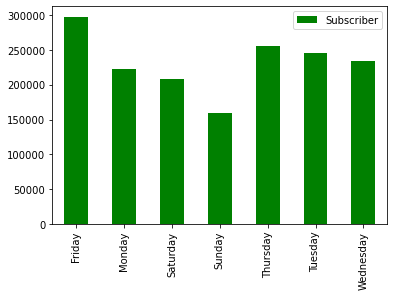

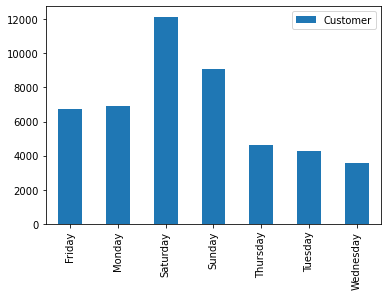

In [256]:
bike['starttime'] = pd.to_datetime(bike['starttime'])

#create new column to get the day name
bike['day_name'] = bike['starttime'].dt.day_name()

#plotting the subscriber data
subsc = bike[(bike['usertype'] == 'Subscriber')]['day_name'].value_counts().sort_index().to_frame('Subscriber')
subsc.plot(kind='bar', color='green')

#plotting the customer data
cust = bike[(bike['usertype'] == 'Customer')]['day_name'].value_counts().sort_index().to_frame('Customer')
cust.plot(kind='bar')

Based on the chart bar, we can see that the subscriber rides more on weekdays instead of the customer.

And the customer rides more on weekends.

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```